## Assignment 9 (10 marks)

### Deadline: 11/21 11:59 pm

### Advanced Sorting

Implement a `RadixSort(arr)` function that takes an array of numbers as input and outputs a sorted array. Remember **radix sort** should execute in _linear time_ so use **counting sort** to sort the elements by their digit. You can assume the all elements in the input array have equal number of digits. Here are some correct outputs of implementing `RadixSort(arr)`.


`arr = [111, 234, 687, 343, 973, 156]
RadixSort(arr)`

`[111, 156, 234, 343, 687, 973]`


`arr = [51, 24, 97, 85, 13, 69, 46, 11]
RadixSort(arr)`

`[11, 13, 24, 46, 51, 69, 85, 97]`

Once you have successfully created `RadixSort(arr)`, run the *Test Case* provided, which will plot the execution time for `RadixSort(arr)`. If you have correctly implemented `RadixSort(arr)`, you will observe a linear plot as shown below.

**Hint:** Since in radix sort, we sort by each digit's place using counting sort, the size of the *temporary storage array* can be fixed at 10. In regular counting sort we need to find the maximum element of the input array, but here since we already know the counting sort will be applied to single digit values at every iteration over the digit-space, the numbers can only range from 0 - 9, thus the size of temporary storage array can be predefined to be 10.


### Reminders
1. Download the Assignment_9.ipynb file and you can start coding inside that file.
2. Before your final submission, rename your submission by adding your surname at the front such that it becomes Surname_Assignment_9.ipynb.

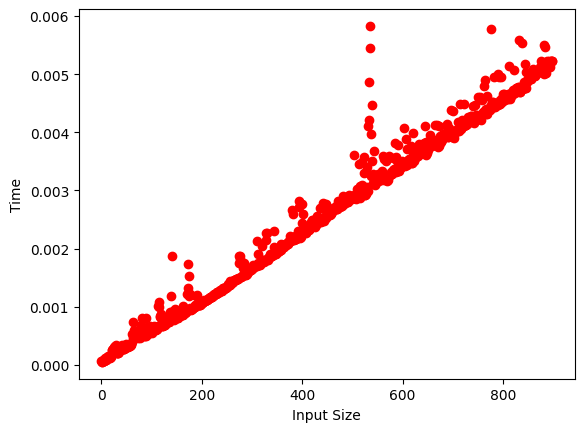

In [6]:
# Test Case

import timeit
import numpy as np
import matplotlib.pyplot as plt

N = 1000

y = []

for i in range(101,N):
    arr = []
    for j in range(100,i):
        arr.append(j)
    comp_time = timeit.timeit('RadixSort(arr)', number=10, globals=globals())
    y.append(comp_time)

plt.plot(y, 'or')
plt.ylabel('Time')
plt.xlabel('Input Size')
plt.show()

In [5]:
def RadixSort(arr):
    max_num = max(arr)
    exp = 1

    while max_num // exp > 0:
        n = len(arr)
        output = [0] * n
        count = [0] * 10 

        for i in range(n):
            index = arr[i] // exp
            count[index % 10] += 1

        for i in range(1, 10):
            count[i] += count[i - 1]

        i = n - 1
        while i >= 0:
            index = arr[i] // exp
            output[count[index % 10] - 1] = arr[i]
            count[index % 10] -= 1
            i -= 1

        for i in range(n):
            arr[i] = output[i]
            
        exp *= 10